<h4>Case Study on Testing of Hypothesis.</h4><br> 
<br>
A company started to invest in digital marketing as a new way of their product promotions. For that they collected data and decided to carry out a study on it.<br> 
<ul>
<li><b>The company wishes to clarify whether there is any increase in sales after stepping into digital marketing.</b></li> 
<li><b>The company needs to check whether there is any dependency between the features “Region” and “Manager”.</b></li>
</ul>
Help the company to carry out their study with the help of data provided.


In [1]:
## importing necessory libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
## reading dataset
df1=pd.read_csv("Sales_add.csv")

In [3]:
df1.head()

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
0,Month-1,Region - A,Manager - A,132921,270390
1,Month-2,Region - A,Manager - C,149559,223334
2,Month-3,Region - B,Manager - A,146278,244243
3,Month-4,Region - B,Manager - B,152167,231808
4,Month-5,Region - C,Manager - B,159525,258402


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 5 columns):
Month                             22 non-null object
Region                            22 non-null object
Manager                           22 non-null object
Sales_before_digital_add(in $)    22 non-null int64
Sales_After_digital_add(in $)     22 non-null int64
dtypes: int64(2), object(3)
memory usage: 960.0+ bytes


##### Total len is 22 rows.

In [5]:
df1.isnull().sum().sum()

0

##### No NULL values present in the dataset.

In [6]:
df1.describe()

,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
count,22.000000,22.000000
mean,149239.954545,231123.727273
std,14844.042921,25556.777061
min,130263.000000,187305.000000
25%,138087.750000,214960.750000
50%,147444.000000,229986.500000
75%,157627.500000,250909.000000
max,178939.000000,276279.000000


#### 1. The company wishes to clarify whether there is any increase in sales after stepping into digital marketing.

In [7]:
## grouping based on regions and their total sum.
df2=df1.groupby('Region',as_index=False).sum()

In [8]:
df2.head()

,Region,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
0,Region - A,1482049,2388531
1,Region - B,1053665,1601095
2,Region - C,747565,1095096


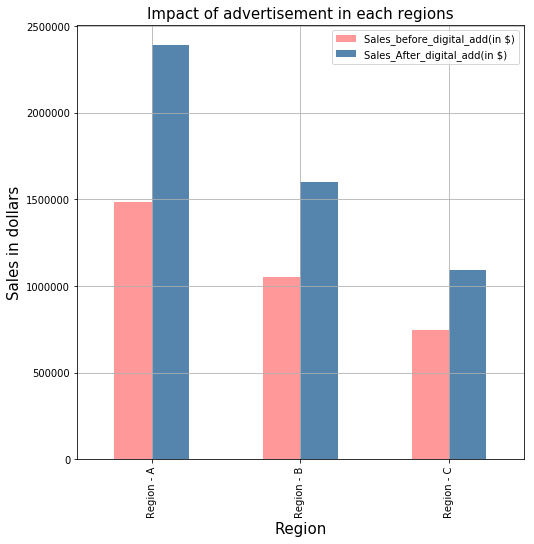

In [9]:
## comparing sales before and after advertisement
df2.plot(x="Region",y=["Sales_before_digital_add(in $)","Sales_After_digital_add(in $)"],kind='bar',figsize=(8,8),color=["#FF9999","#5584AC"])
plt.title("Impact of advertisement in each regions",fontsize=15)
plt.xlabel("Region",fontsize=15)
plt.ylabel("Sales in dollars",fontsize=15)
plt.grid()
plt.show()

##### It is evident from the above graph that there is a substantial increase in sales in all regions.

In [10]:
## calculating each regions increase in sales in percentage.
rega=round(((df2['Sales_After_digital_add(in $)'][0]-df2['Sales_before_digital_add(in $)'][0])/df2['Sales_before_digital_add(in $)'][0])*100,2)
regb=round(((df2['Sales_After_digital_add(in $)'][1]-df2['Sales_before_digital_add(in $)'][1])/df2['Sales_before_digital_add(in $)'][1])*100,2)
regc=round(((df2['Sales_After_digital_add(in $)'][2]-df2['Sales_before_digital_add(in $)'][2])/df2['Sales_before_digital_add(in $)'][2])*100,2)

In [11]:
print("Advertisment in region A has resulted in",rega,"percent increase in sales.")
print("Advertisment in region B has resulted in",regb,"percent increase in sales.")
print("Advertisment in region C has resulted in",regc,"percent increase in sales.")

Advertisment in region A has resulted in 61.16 percent increase in sales.
Advertisment in region B has resulted in 51.95 percent increase in sales.
Advertisment in region C has resulted in 46.49 percent increase in sales.


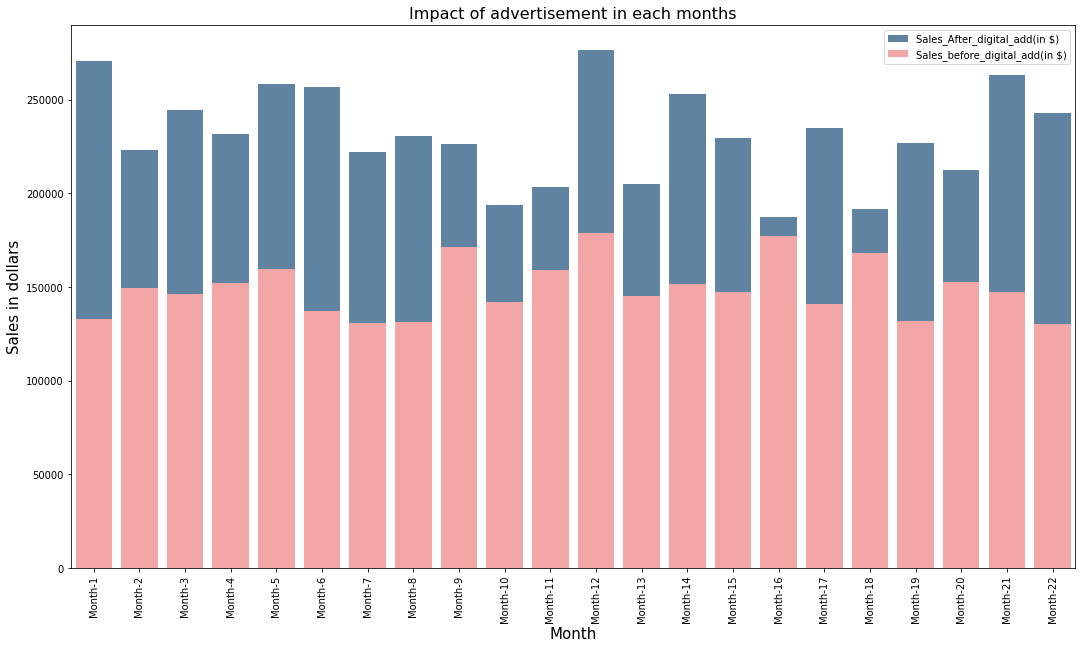

In [12]:
## impact of sales in months before and after advertisement.

# creating subplots
ax = plt.subplots(figsize=(18,10))

# plotting columns
ax = sns.barplot(x ='Month',y ='Sales_After_digital_add(in $)',label='Sales_After_digital_add(in $)',data = df1,color='#5584AC')
ax = sns.barplot(x ='Month',y ='Sales_before_digital_add(in $)',label='Sales_before_digital_add(in $)',data = df1,color='#FF9999')

plt.title("Impact of advertisement in each months",fontsize=16)  
# renaming the axes
ax.set(xlabel="x-axis", ylabel="y-axis")
ax.legend()
plt.xlabel("Month",fontsize=15)
plt.ylabel("Sales in dollars",fontsize=15)
plt.xticks(rotation=90)
plt.show()

#### Conclusion : As the above figures show , advertisement has resulted in : <br> 
<ul>
    <li><b>Increase in sales in all regions</b></li>
    <li><b>Increase in sales in all the months</b></li>
</ul>

#### The company needs to check whether there is any dependency between the features "Region" and "Manager".

In [13]:
## contingency table between region and manager.
pd.crosstab(df1.Region, df1.Manager)

Manager,Manager - A,Manager - B,Manager - C
Region,,,
Region - A,4,3,3
Region - B,4,1,2
Region - C,1,3,1


In [14]:
## loading chi2_contingency
from scipy.stats import chi2_contingency

In [15]:
c, p, dof, expected = chi2_contingency(pd.crosstab(df1.Region, df1.Manager))

In [16]:
## the test statistic.
c

3.050566893424036

In [17]:
## degree of freedom
dof

4

In [18]:
## expected frequencies
expected

array([[4.09090909, 3.18181818, 2.72727273],
       [2.86363636, 2.22727273, 1.90909091],
       [2.04545455, 1.59090909, 1.36363636]])

In [19]:
## p value
p

0.5493991051158094

#### P greather than 0.05 therefore we cannot neglect NULL hypothesis which stated they are independent. We falied to find evidence against the NULL hypothesis. So they tends to be independent.